<a href="https://colab.research.google.com/github/iotanalytics/IoTTutorial/blob/main/code/preprocessing_and_decomposition/EMD_EEMD_vs_VMD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EMD/EEMD vs VMD


## Introduction
Both the methods are used to decompose a signal into various time domain signals called modes. The main difference is that EMD decomposes the signal adaptively and in a data-driven way whereas VMD method is non-recursive decomposition technique, where the modes are decomposed simultaneously about their center frequency.

*VMD*

* VMD decomposes a multicomponent signal into a series of sub-signals (mono-component) that have specific sparsity properties. 
* For a precise filter operation, it is necessary that the different mono-components are well isolated in the frequency spectrum of the raw signal. Otherwise, decomposition cannot be successful. 
* The sparsity property employed in VMD is that the mono-component should be mostly compact around a center pulsation in the frequency spectrum. In practical problems, these terms may not be universal in all cases. 
* For rough filter operation, VMD can work in most cases. The goal of extracting the interesting component from the raw signal can also be obtained, when different mono-components overlap in the corresponding frequency spectrum useless components are inevitable.

*EMD/EEMD*

* EMD/EEMD can work when the instantaneous frequencies (IFs) of different mono-components are distinct enough at each time point. 
* It is necessary for the ratio between a relatively low IF and a relatively high IF to be smaller than 0.75, and an ideal decomposition result can be obtained when the ratio is smaller than 0.5, for reasonable number of sifting iterations. 
* For a precise filtering operation, this necessary condition of the frequency resolution should be met; otherwise, a relatively large calculation error may be introduced. 
* Algorithms deriving from EMD can be employed in conjunction with other decomposition methods such as wavelet transforms, principal component analysis and adaptive multiscale morphological analysis to further remove color noise and highlight the specific characteristics of the valuable component.

In a study conducted by Hadiyoso et al (2020), they found that EEMD and VMD both outperformed EMD, as expected. However, the interesting finding was that the EEMD and VMD were very close in performance. 

In their comparative study, Maji and Pal (2016) observed that EMD method is more sensitive towards the lowest frequency present in the signal, but VMD was less sensitive. However, VMD showed the inverse characteristics towards the higher frequencies present in the signal. Another thing, the same features were tested on the different signals containing low and high frequency noises. Here it was noticed that VMD method more efficiently eliminated the high frequency noises keeping all characteristics of signal almost unchanged. Whereas EMD did the same but diminished the signal amplitude. Similarly in processing of low frequency signal EMD method shows comparatively better performance.


## Code Example

### Data

In [2]:
import pandas as pd
## example data importing
data = pd.read_csv('https://raw.githubusercontent.com/iotanalytics/IoTTutorial/main/data/SCG_data.csv').drop('Unnamed: 0',1).to_numpy()[10,:1000]

### EMD

In [19]:
!pip install EMD-signal

     |████████████████████████████████| 42 kB 542 kB/s 
     |████████████████████████████████| 81 kB 3.8 MB/s 
     |████████████████████████████████| 47 kB 3.8 MB/s 
     |████████████████████████████████| 65 kB 2.7 MB/s 


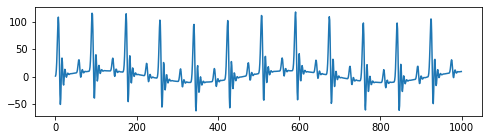

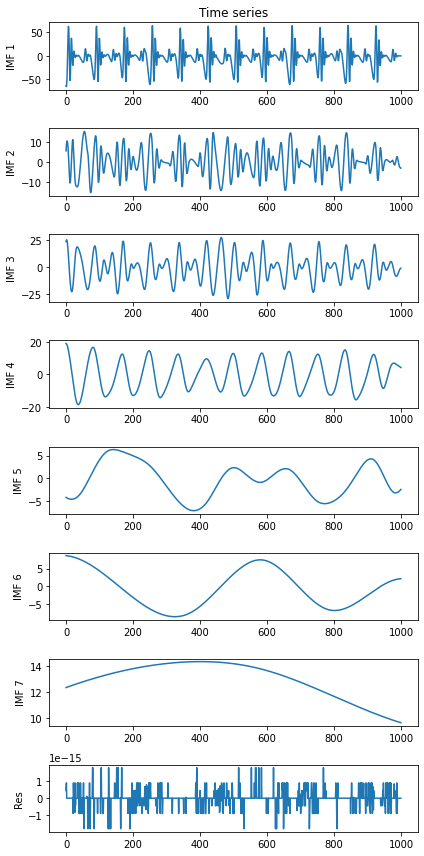

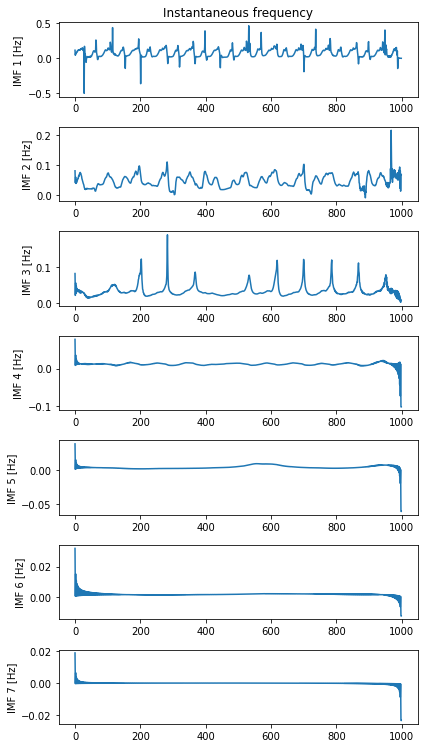

In [24]:
from PyEMD import EMD, Visualisation
import matplotlib.pyplot as plt

import numpy as np



S = data
t = range(len(S))

# Extract imfs and residue
# In case of EMD
emd = EMD()
emd.emd(S)
imfs, res = emd.get_imfs_and_residue()

# In general:
#components = EEMD()(S)
#imfs, res = components[:-1], components[-1]
plt.figure(figsize=(8,2))
plt.plot(S)
vis = Visualisation()
vis.plot_imfs(imfs=imfs, residue=res, t=t, include_residue=True)
vis.plot_instant_freq(t, imfs=imfs)
vis.show()

### EEMD

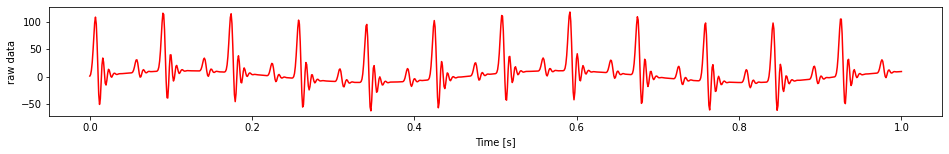

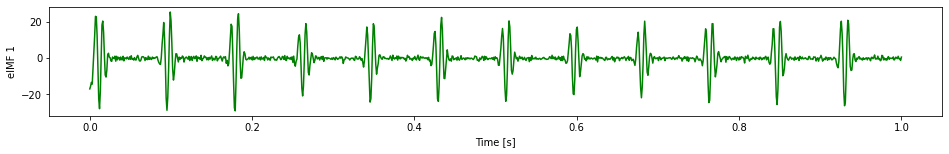

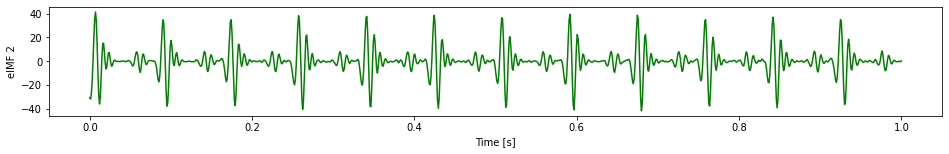

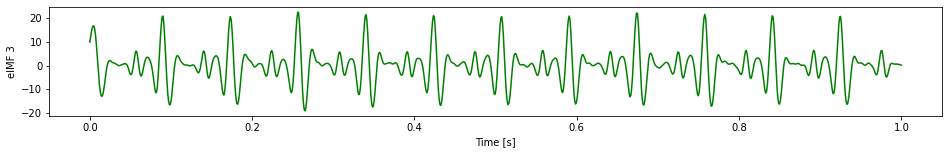

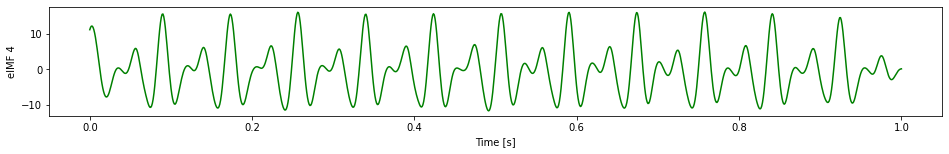

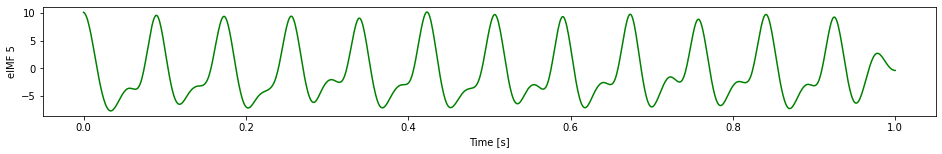

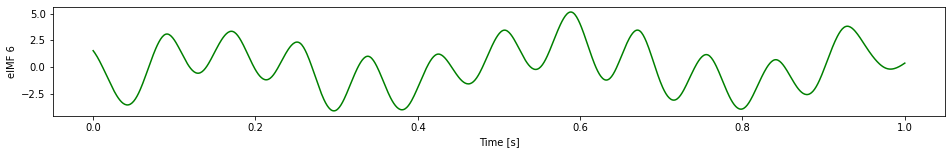

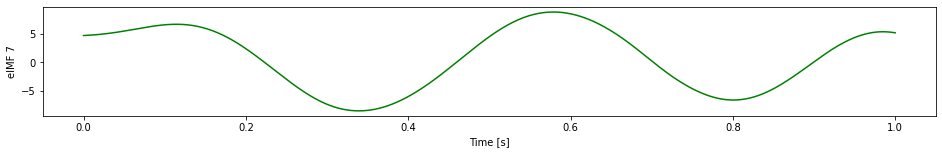

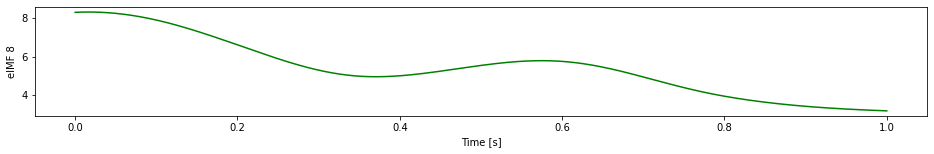

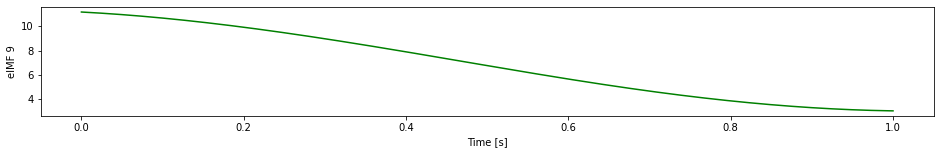

In [25]:

from PyEMD import EEMD
import numpy as np
import pylab as plt
# import matplotlib.pyplot as plt  

S = data
t = np.linspace(0, 1, len(S))

# Assign EEMD to `eemd` variable
eemd = EEMD()


# Execute EEMD on S
eIMFs = eemd.eemd(S, t)
nIMFs = eIMFs.shape[0]

# Plot results
plt.figure(figsize=(16,2))
# plt.plot(S)

plt.plot(t, S, 'r')
plt.xlabel("Time [s]")
plt.ylabel("raw data")
plt.show()

for n in range(nIMFs):
 #   plt.subplot(nIMFs+1, 1, n+2)
    plt.figure(figsize=(16,2))
    plt.plot(t, eIMFs[n], 'g')
    plt.xlabel("Time [s]")
    plt.ylabel("eIMF %i" %(n+1))
    plt.locator_params(axis='y', nbins=5)
    plt.show()


### VMD

In [27]:
!pip install vmdpy

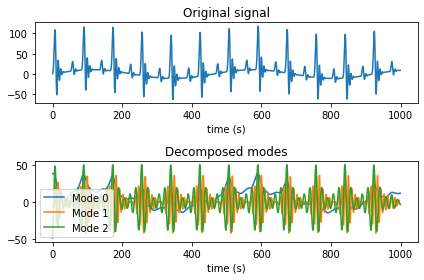

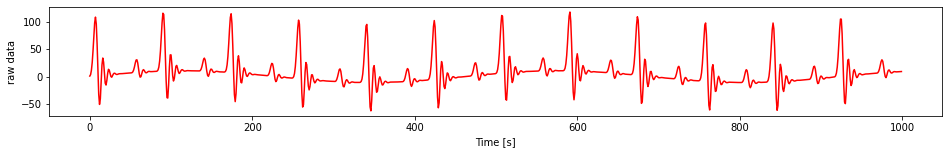

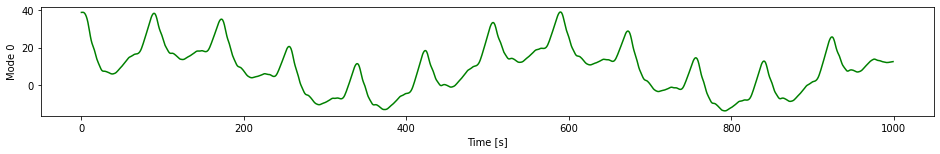

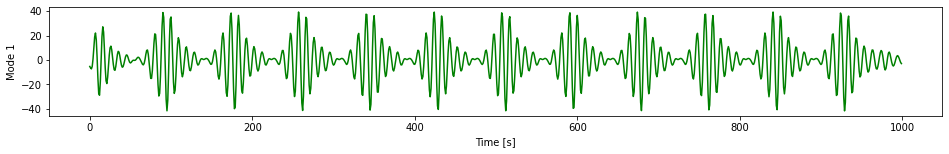

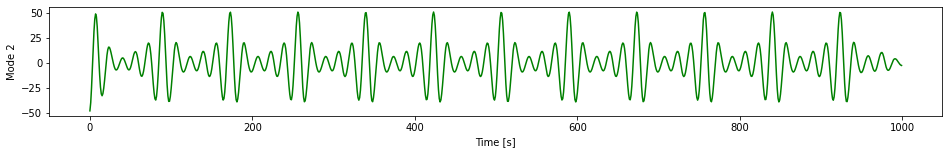

In [29]:
#%% Simple example: generate signal with 3 components + noise  
import numpy as np  
import matplotlib.pyplot as plt  
from vmdpy import VMD  

# use seismic data
f = data
# f = wdenoise(data, 'sym4', 0.4)
T = 100
K = 3               # 5 modes
alpha = 10000       # moderate bandwidth constraint  
tau = 0.1           # noise-tolerance (no strict fidelity enforcement)  
DC = 0             # no DC part imposed  
init = 1           # initialize omegas uniformly  
tol = 1e-7  

#. Run VMD 
u, u_hat, omega = VMD(f, alpha, tau, K, DC, init, tol)  

#. Visualize decomposed modes
plt.figure()
plt.subplot(2,1,1)
plt.plot(f)
plt.title('Original signal')
plt.xlabel('time (s)')
plt.subplot(2,1,2)
plt.plot(u.T)
plt.title('Decomposed modes')
plt.xlabel('time (s)')
plt.legend(['Mode %d'%m_i for m_i in range(u.shape[0])])
plt.tight_layout()

# Plot raw
plt.figure(figsize=(16,2))
plt.plot(f, 'r')
plt.xlabel("Time [s]")
plt.ylabel("raw data")
plt.show()

# Plot results
for i in range(u.shape[0]):
    plt.figure(figsize=(16,2))
    plt.plot(u[i], 'g')
    plt.xlabel("Time [s]")
    plt.ylabel("Mode %i" %(i))
    plt.locator_params(axis='y', nbins=5)
    plt.show()

## Discussion

Pros:

In EMD, the frequency is derived by differentiation rather than by convolution, as for the wavelet analysis; this allows to overcome the uncertainty principle limitations.

EMD is a specialized analysis. It works well on some types of time series data.

Cons:

The drawback for EMD is related on the deﬁciency of a theoretical basis, but it is ground just on an empirical basis.

EMD is very sensitive to noise and runs into the problem of mode mixing.

Source: https://github.com/laszukdawid/PyEMD

EMD variations:

Ensemble EMD (EEMD),
"Complete Ensemble EMD" (CEEMDAN)
different settings and configurations of vanilla EMD.
Image decomposition (EMD2D & BEMD) (experimental, no support)
